In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

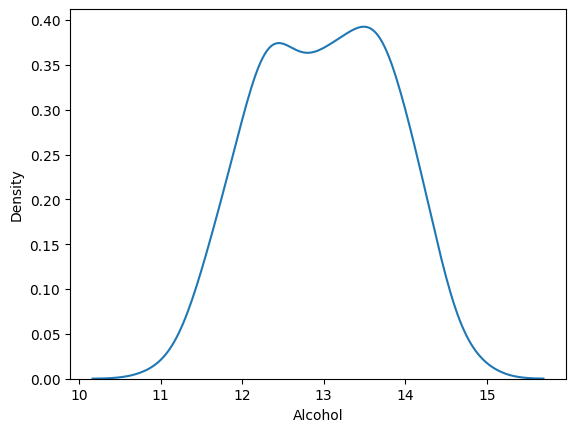

In [7]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

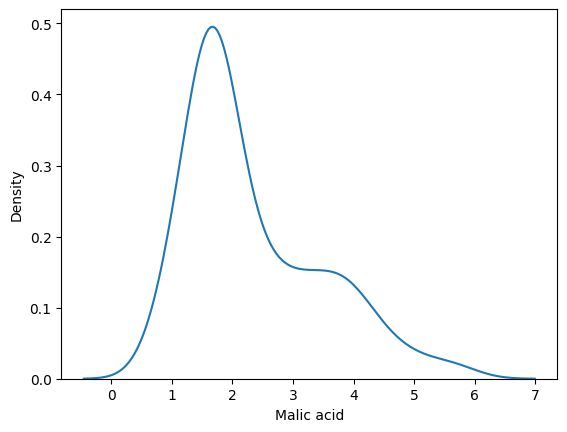

In [8]:
sns.kdeplot(df['Malic acid'])


In [12]:
# color_dict={1:'red',3:'green',2:'blue'}
# sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Class label',axis=1),
                                               df['Class label'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [19]:
# transforming and trining sets 
X_trainScaled=scaler.transform(X_train)
X_testScaled=scaler.transform(X_test)

In [21]:
X_trainScaled = pd.DataFrame(X_trainScaled, columns=X_train.columns)
X_testScaled=pd.DataFrame(X_testScaled,columns=X_test.columns)

In [22]:
np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
X_trainScaled.describe().round(2)
#compared both before scaling and after 

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


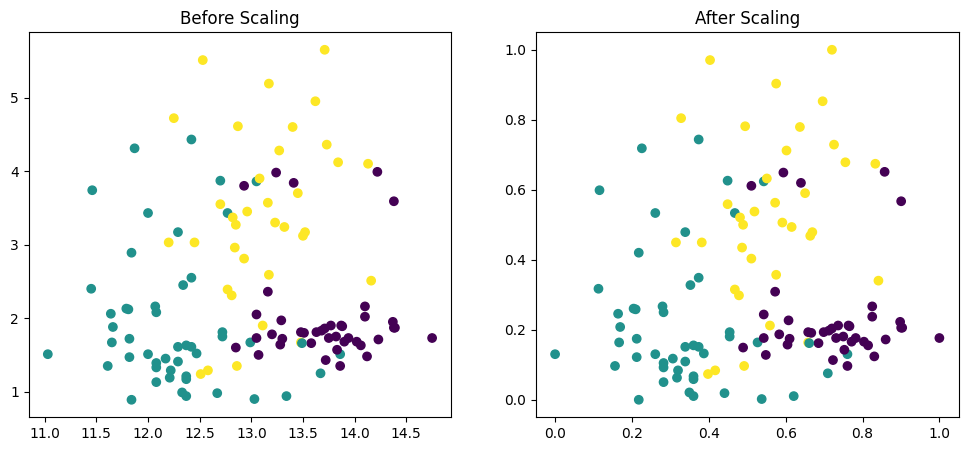

In [30]:
# before scaling and after scaling 
#range changed 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_trainScaled['Alcohol'], X_trainScaled['Malic acid'],c=Y_train)
ax2.set_title("After Scaling")
plt.show()

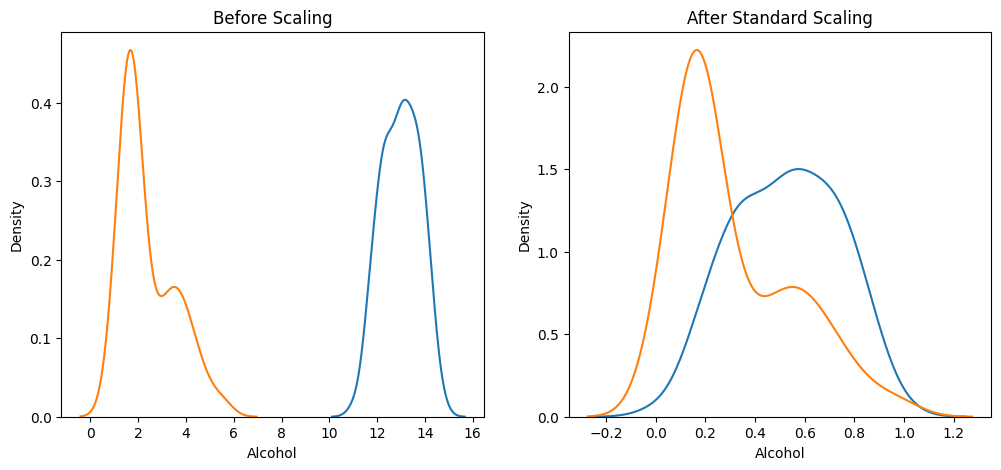

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_trainScaled['Alcohol'], ax=ax2)
sns.kdeplot(X_trainScaled['Malic acid'], ax=ax2)
plt.show()